In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the dataset 
load diabetes_data

In [2]:
df = pd.read_csv('diabetes_data.csv')
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
len(df)

768

## Divide the dataset into train and test datasets

In [84]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['Outcome','Pregnancies'])], df[['Outcome']], test_size=0.2, random_state=42)

In [85]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[['Age','BloodPressure']], df[['Outcome']], test_size=0.2, random_state=42)

In [86]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[['Age','BloodPressure','Glucose']], df[['Outcome']], test_size=0.2, random_state=42)

In [108]:
xTrain

,Age,BloodPressure,Glucose
60,21,0,84
618,50,82,112
346,22,46,139
294,65,50,161
231,46,80,134
...,...,...,...
71,26,64,139
106,27,122,96
270,38,86,101
435,29,0,141


In [109]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(xTrain)
xTransf_trn = ss.transform(xTrain)
xTransf_tst = ss.transform(xTest)
xTransf_trn

array([[-1.03594038, -3.75268255, -1.15139792],
       [ 1.48710085,  0.68034485, -0.27664283],
       [-0.94893896, -1.2658623 ,  0.56687102],
       ...,
       [ 0.44308379,  0.89659009, -0.62029661],
       [-0.33992901, -3.75268255,  0.62935353],
       [-1.03594038,  1.43720319,  0.12949347]])

In [110]:
yTrain = np.array(yTrain)
yTest = np.array(yTest)

## Implement the following functions to create your own logistic regression algorithm from scratch.
#### Feel free to use more additinal functions in your implementation.

In [194]:
class LogReg(object):
    def __init__(self, epsilon=1e-6, step_size=1e-4, max_steps=1000):
        self.epsilon=epsilon
        self.step_size=step_size
        self.max_steps=max_steps
        self.beta = np.array([])
    
   
    def logistic_func(self, beta, X):
        """
        :param X: data matrix (2 dimensional np.array)
        :param beta: value of beta (1 dimensional np.array)

        """
        if X[:,0].prod()!=1:    # դրսից, object-ի վրայից կետով մեթոդը կանչելու դեպքի համար, ներսից կանչելիս արդեն կա 1-երի սյունը պետք չի ավելացնի կրկնակի է լինում
            X = (np.hstack([np.ones([len(X),1]),X])).copy()
        
        return (1/(1+np.e**(-X.dot(beta))))    
    
    def gradient(self, beta, X, Y):
        """
        :param X: data matrix (2 dimensional np.array)
        :param Y: response variables (1 dimensional np.array)
        :param beta: value of beta (1 dimensional np.array)
        :return: np.array i.e. gradient according to the data

        """
        
        if X[:,0].prod()!=1:    # դրսից մեթոդը կանչելու դեպքի համար, ներսից կանչելիս արդեն կա 1-երի սյունը պետք չի ավելացնի կրկնակի է լինում
            X = (np.hstack([np.ones([len(X),1]),X])).copy()
        
        return ((np.subtract(self.logistic_func(beta, X),Y)).T.dot(X)).reshape(-1,1)
    
    def cost_func(self, X, Y, beta):
        """
        :param X: data matrix (2 dimensional np.array)
        :param Y: response variables (1 dimensional np.array)
        :param beta: value of beta (1 dimensional np.array)
        :return: numberic value of the cost function

        """
        if X[:,0].prod()!=1:    # դրսից մեթոդը կանչելու դեպքի համար, ներսից կանչելիս արդեն կա 1-երի սյունը պետք չի ավելացնի կրկնակի է լինում
            X = (np.hstack([np.ones([len(X),1]),X])).copy()
        
        return (1/len(Y))*(-Y.T.dot(np.log(self.logistic_func(beta,X)))-
                           (1-Y).T.dot(np.log(1-self.logistic_func(beta,X))))
    
    
    def fit(self,X,Y):   # gradient_descent
        
        X = (np.hstack([np.ones([len(X),1]),X])).copy()
        
        b0=np.ones(X.shape[1]).reshape(-1,1)
        b0=b0*0.5
        b0[0]=-1

        beta = b0

        cost = 1000

        for i in range(self.max_steps):
            costf = self.cost_func(X, Y, beta)
            grad = self.gradient(beta, X, Y)

            if cost - costf <= self.epsilon:
                break

            beta = np.add(beta, -self.step_size*grad)

            cost = costf
        
        self.beta=beta.round(10)
        
    def predict(self, X):
        return self.logistic_func(self.beta,X)
        

In [195]:
logreg = LogReg(epsilon=1e-6, step_size=1e-4, max_steps=1000)

In [196]:
logreg.fit(xTransf_trn,yTrain)

In [198]:
b=logreg.beta
b

array([[-0.7815481 ],
       [ 0.41204829],
       [-0.05501428],
       [ 1.07525642]])

In [199]:
logreg.logistic_func(b,xTransf_tst)

array([[0.23984373],
       [0.17909703],
       [0.16463593],
       [0.22456212],
       [0.5692378 ],
       [0.35502411],
       [0.05821614],
       [0.42386365],
       [0.61559791],
       [0.77235898],
       [0.29732433],
       [0.88763725],
       [0.50456241],
       [0.21954712],
       [0.09601706],
       [0.31854175],
       [0.09946356],
       [0.09384948],
       [0.83525976],
       [0.39064463],
       [0.30569474],
       [0.11396895],
       [0.29843989],
       [0.1163725 ],
       [0.42333368],
       [0.83010633],
       [0.20366404],
       [0.15820167],
       [0.13950363],
       [0.15673855],
       [0.57384635],
       [0.77898905],
       [0.77656122],
       [0.70491263],
       [0.37970401],
       [0.56032475],
       [0.94361655],
       [0.25874747],
       [0.559894  ],
       [0.3817994 ],
       [0.10640796],
       [0.68619807],
       [0.44394869],
       [0.23633765],
       [0.1198403 ],
       [0.56727423],
       [0.42740672],
       [0.133

In [211]:
y_predp=logreg.predict(xTransf_tst)
y_predp

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

## Run logistic regression using the features of your choice and using "Outcome" as a target variable

In [207]:
logreg = LogReg(epsilon=1e-8, step_size=1e-6, max_steps=100000)
logreg.fit(xTransf_trn,yTrain)
b=logreg.beta
b

array([[-0.78154865],
       [ 0.41205905],
       [-0.05478411],
       [ 1.07491172]])

## Use the logistic regression available in Sklearn on the same data.

In [78]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[['Age','BloodPressure','Glucose']], df[['Outcome']], test_size=0.2, random_state=42)

In [206]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(xTrain)
xTransf_trn = ss.transform(xTrain)
xTransf_tst = ss.transform(xTest)

In [208]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xTransf_trn, yTrain)
y_pred = logreg.predict(xTransf_tst)
logreg.intercept_, logreg.coef_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([-0.77813231]), array([[ 0.40894924, -0.06715711,  1.08999253]]))

In [214]:
d = [x==y for x in y_pred for y in y_predp]
d.count(True), len(d), d.count(True)/len(d)

(13906, 23716, 0.5863552032383201)

In [215]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [216]:
from sklearn import metrics

cnf = metrics.confusion_matrix(yTest,y_pred)
print(cnf)

TN = cnf[0][0]
FP = cnf[0][1]
FN = cnf[1][0]
TP = cnf[1][1]
Total = TN+FP+FN+TP

[[86 13]
 [23 32]]


In [217]:
print("Accuracy=", metrics.accuracy_score(yTest,y_pred))
print((TP+TN)/Total)
print('\n')
print("Recall=", metrics.recall_score(yTest,y_pred))
print((TP/(TP+FN)))
print('\n')
print("Precision", metrics.precision_score(yTest,y_pred))
print((TP/(TP+FP)))

Accuracy= 0.7662337662337663
0.7662337662337663


Recall= 0.5818181818181818
0.5818181818181818


Precision 0.7111111111111111
0.7111111111111111


In [218]:
len(xTest)

154

## Extra: try to plot the results of your algorithm i.e. a scatter plot of points classified into 2 classes in different colors.

In [219]:
#y_pred_own1 = y_pred_own[y_pred_own[1]>0.5]
#y_pred_own1
y_predp

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

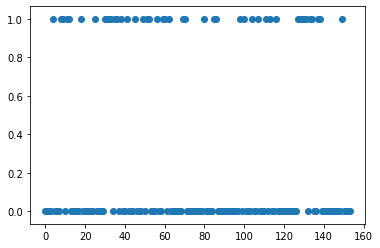

In [220]:
plt.scatter(range(len(y_predp)),y_predp)

In [221]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

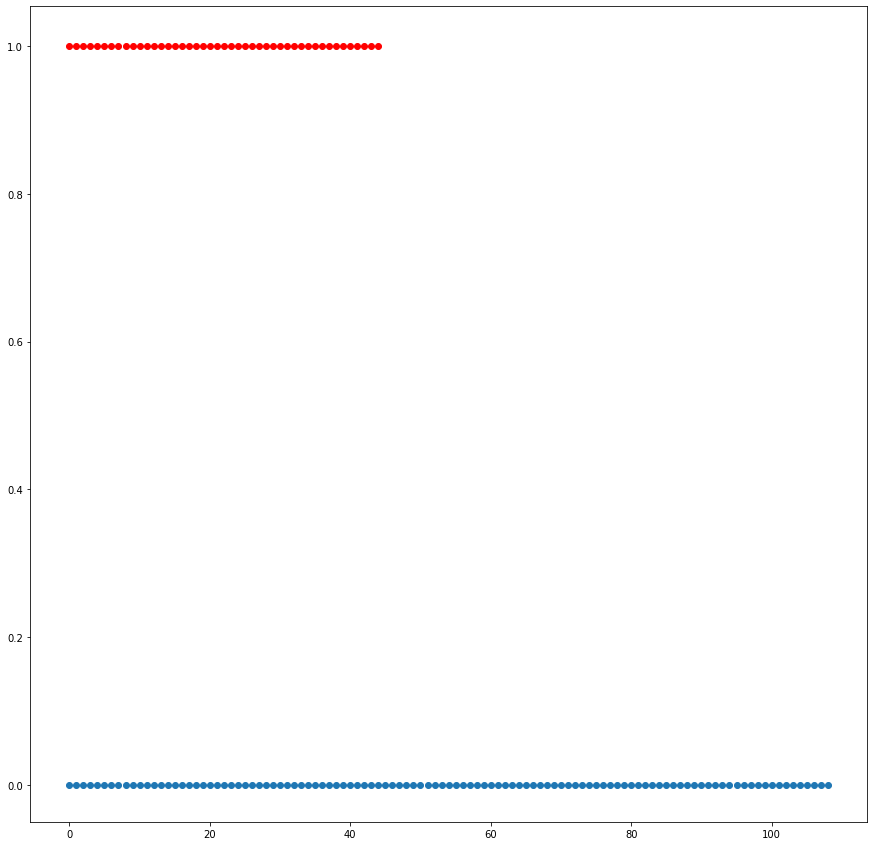

In [222]:
y_pred1 = [y for y in y_pred if y>0]
y_pred2 = [y for y in y_pred if y==0]
plt.figure(figsize=(15,15))
plt.scatter(range(len(y_pred1)),y_pred1, c='r')
plt.scatter(range(len(y_pred2)),y_pred2)

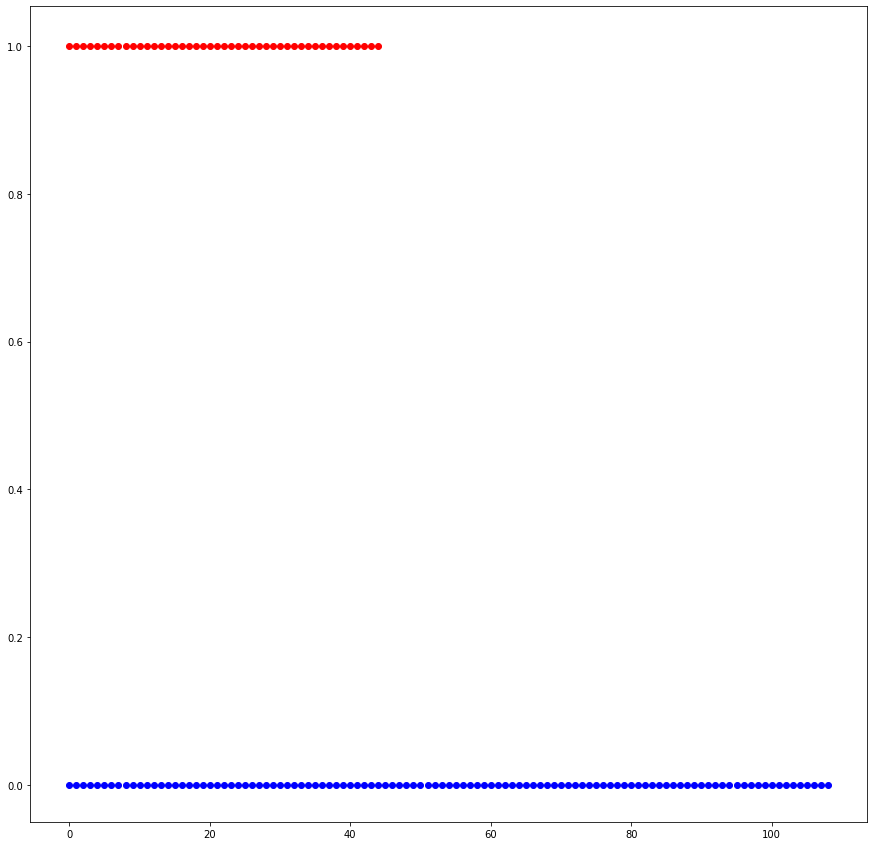

In [224]:
y_pred1 = [y for y in y_predp if y>0.5]
y_pred2 = [y for y in y_predp if y<0.5]
plt.figure(figsize=(15,15))
plt.scatter(range(len(y_pred1)),y_pred1, c='r')
plt.scatter(range(len(y_pred2)),y_pred2, c= 'b')